## Intoduction

#### Customer segmentation is a strategic marketing approach that categorizes a customer base into distinct groups based on common characteristics, behaviors, or demographics. The primary goal is to gain deeper insights into customer needs and deliver personalized, targeted solutions. By leveraging segmentation, businesses can effectively align their messaging to engage the right audience. 

#### Prior to implementing segmentation algorithms, conducting Exploratory Data Analysis (EDA) is an essential step to ensure a comprehensive understanding of the data and its underlying patterns.

## Data preparation and Cleaning 

In [292]:
# Importing necessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt 
from scipy.stats import pointbiserialr


In [293]:
# reading tha data 
data = pd.read_csv('ifood_df.csv')
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [294]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

## Looking for missing values

In [296]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

## Assesing unique values 

In [298]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [299]:
data.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

## Data Exploration 

### .Box plot for the total amount spent on all products(MnTotal) 

Text(0.5, 1.0, 'Box Plot For MnTotal')

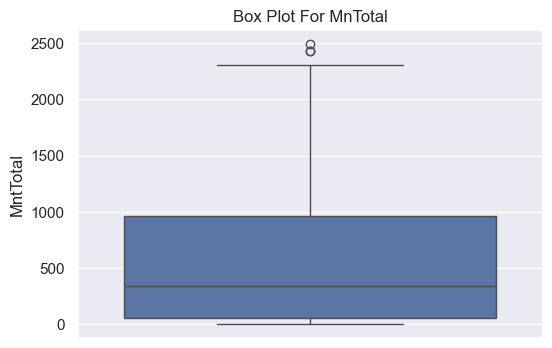

In [302]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,y='MntTotal')
plt.title('Box Plot For MnTotal')

In [303]:
Q1 =data['MntTotal'].quantile(.25)
Q3 =data['MntTotal'].quantile(.75)
IQR=Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers = data[(data['MntTotal']<lower_bound) | (data['MntTotal']>upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


## remove outliers 

In [305]:
data = data[(data['MntTotal']>lower_bound)& (data['MntTotal']<upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


Text(0, 0.5, 'Income')

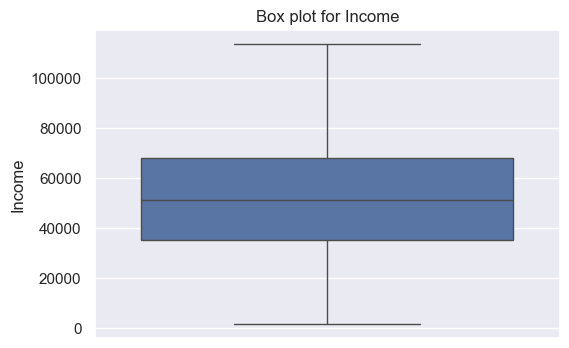

In [306]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data,y='Income')
plt.title('Box plot for Income')
plt.ylabel('Income')

Text(0, 0.5, 'Frequency')

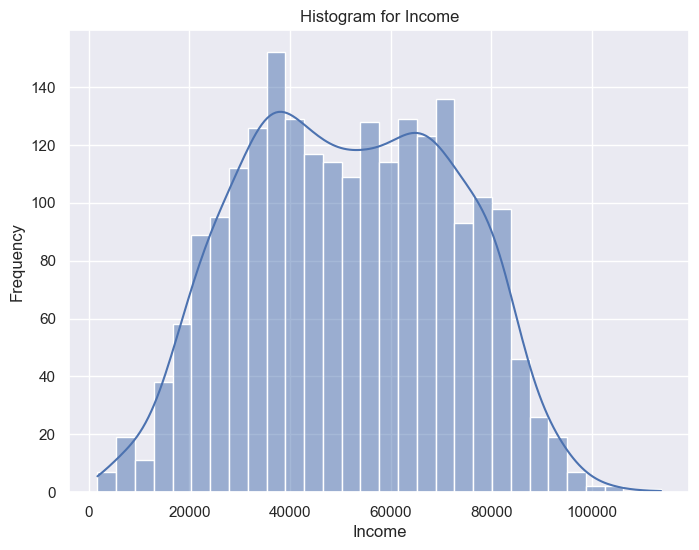

In [307]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x='Income',bins=30,kde=True)
plt.title('Histogram for Income')
plt.ylabel('Frequency')

##  Histogram for age 

Text(0, 0.5, 'Frequency')

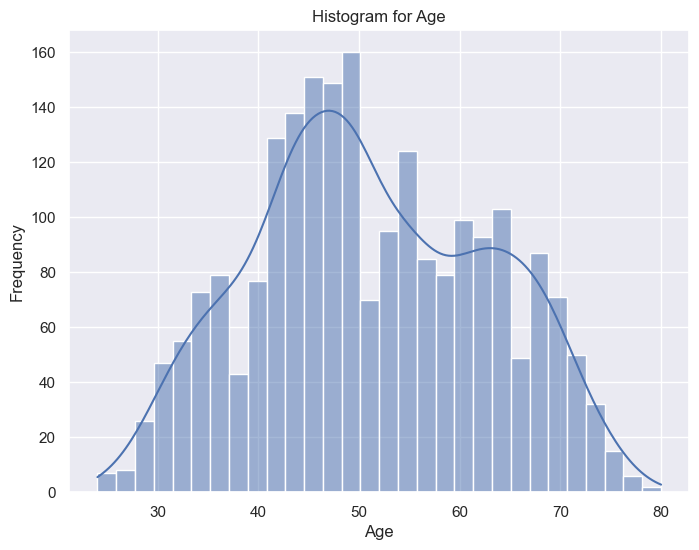

In [309]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x='Age',bins=30,kde=True)
plt.title('Histogram for Age')
plt.ylabel('Frequency')

In [310]:
print("Skewness: %f" %data['Age'].skew())
print("Kurtosis: %f" %data['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


## Correltaion Matrix 

In [312]:
cols_demographics = ['Income','Age']
cols_childern = ['Kidhome','Teenhome']
cols_martial = ['marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow']
cols_mnt = ['MntTotal','MntFishProducts','MntMeatProducts','MntSweetProducts','MntGoldProds','MntRegularProds']
cols_comunication = ['Complain','Response','Customer_Days']
cols_campaigns= ['AcceptedCmpOverall','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5' ]
cols_source_of_purchase= ['NumDealsPurchases','NumWebVisitsMonth','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
cols_education= ['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

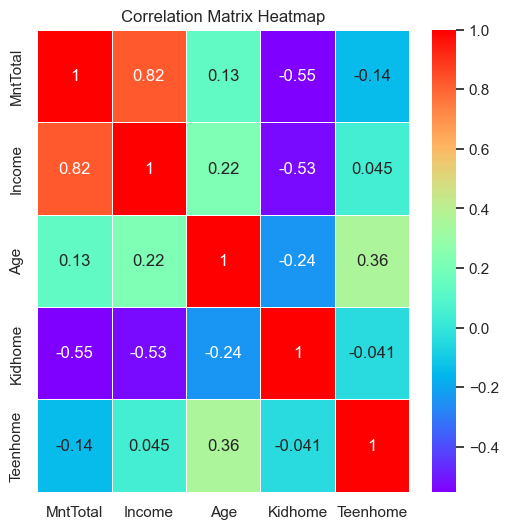

In [313]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_childern].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap='rainbow',linewidths=.5)
plt.title('Correlation Matrix Heatmap')

## Point Biserialr Correltaions for binary varibales 

In [315]:
for col in cols_martial:
    correlation, p_value = pointbiserialr(data[col],data['MntTotal'])
    print(f'{correlation:.4f}:Point-Biserialr Correltaion for {col} with p_value {p_value:.4f}')

0.0053:Point-Biserialr Correltaion for marital_Divorced with p_value 0.8041
-0.0188:Point-Biserialr Correltaion for marital_Married with p_value 0.3767
0.0011:Point-Biserialr Correltaion for marital_Single with p_value 0.9571
0.0008:Point-Biserialr Correltaion for marital_Together with p_value 0.9708
0.0370:Point-Biserialr Correltaion for marital_Widow with p_value 0.0826


In [316]:
for col in cols_education:
    correlation,p_value = pointbiserialr(data[col],data['MntTotal'])
    print(f"{correlation:.4f}:point biserial correlation for {col} with p_value {p_value:.4f}")

-0.0593:point biserial correlation for education_2n Cycle with p_value 0.0054
-0.1389:point biserial correlation for education_Basic with p_value 0.0000
0.0159:point biserial correlation for education_Graduation with p_value 0.4551
0.0004:point biserial correlation for education_Master with p_value 0.9842
0.0737:point biserial correlation for education_PhD with p_value 0.0005


## Feature Engineering 

In [318]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

C:\Users\vip\AppData\Local\Temp\ipykernel_1312\763043852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital', y='MntTotal', data=data, palette='rainbow')


Text(0, 0.5, 'MntTotal')

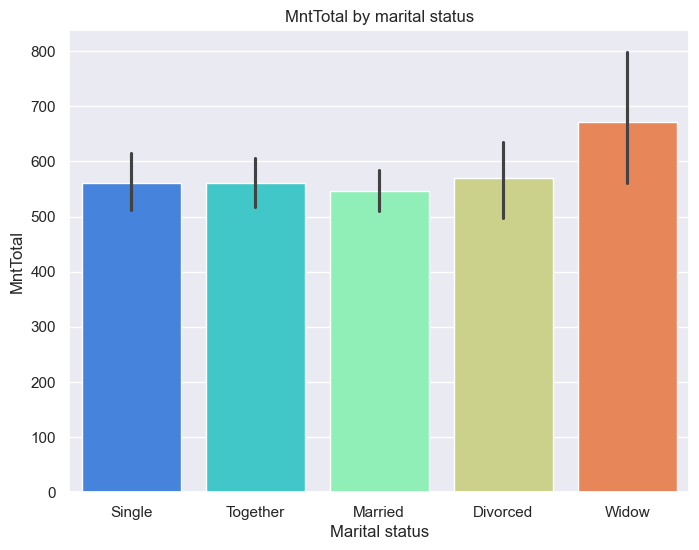

In [319]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='rainbow')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

## New feature: In_relationship

In [321]:
def get_relationship(row):
    if row['marital_Married']==1:
        return 1
    elif row['marital_Together']==1:
        return 1
    else :
        return 0 
data['In_relationship']= data.apply(get_relationship,axis=1)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


## K_Means Clustering

In [323]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


## Principal Component Analysis(PCA)
#### PCA is a technique of dimensionality reduction takes the original features(Dinmension) and create new feature that capture the most variance of the data.

In [326]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

## Elbow Method 

In [328]:
x = data_scaled[cols_for_clustering]
inertia_list = []
for k in range(2,10):
    inertia = KMeans(n_clusters=k,random_state=7).fit(x).inertia_
    inertia_list.append(inertia)

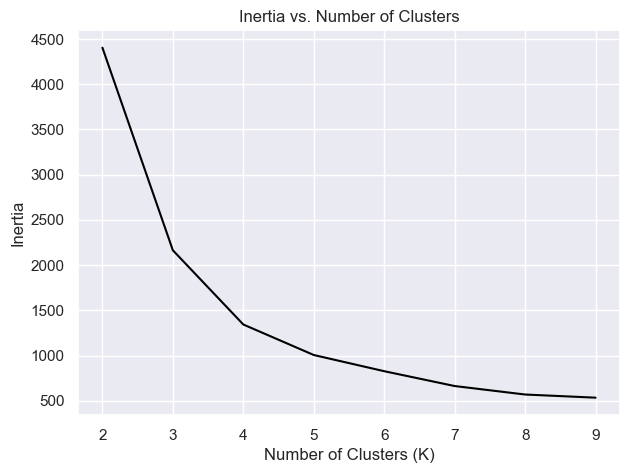

In [329]:
plt.figure(figsize=(7,5))
plt.plot(range(2,10),inertia_list,color ="0")
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [330]:
model = KMeans(n_clusters = 4)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

## Let's Explore Clusters 

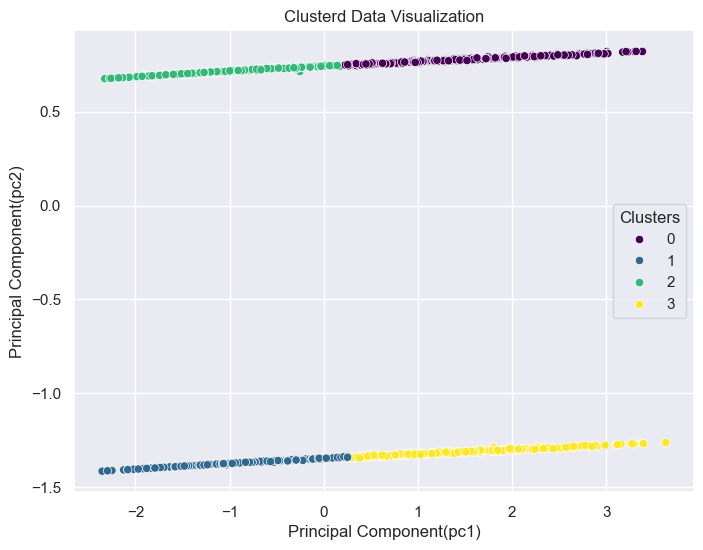

In [332]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='pc1',y="pc2",data=data_scaled,palette='viridis',hue='Cluster')
plt.title('Clusterd Data Visualization')
plt.xlabel('Principal Component(pc1)')
plt.ylabel('Principal Component(pc2)')
plt.legend(title='Clusters')

In [333]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,71818.929329,1147.372792,1.0
1,37332.339956,150.761589,0.0
2,37892.819883,158.463158,1.0
3,71946.155488,1159.612805,0.0


In [334]:
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntFishProducts,MntMeatProducts,MntSweetProducts,MntGoldProds,MntRegularProds
0,0,1147.372792,75.577739,341.326855,54.717314,71.093640,1076.279152
1,1,150.761589,10.971302,38.774834,7.732892,25.099338,125.662252
2,2,158.463158,11.423392,39.438596,7.913450,24.500585,133.962573
3,3,1159.612805,77.603659,357.902439,55.314024,74.280488,1085.332317


C:\Users\vip\AppData\Local\Temp\ipykernel_1312\1826437796.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")


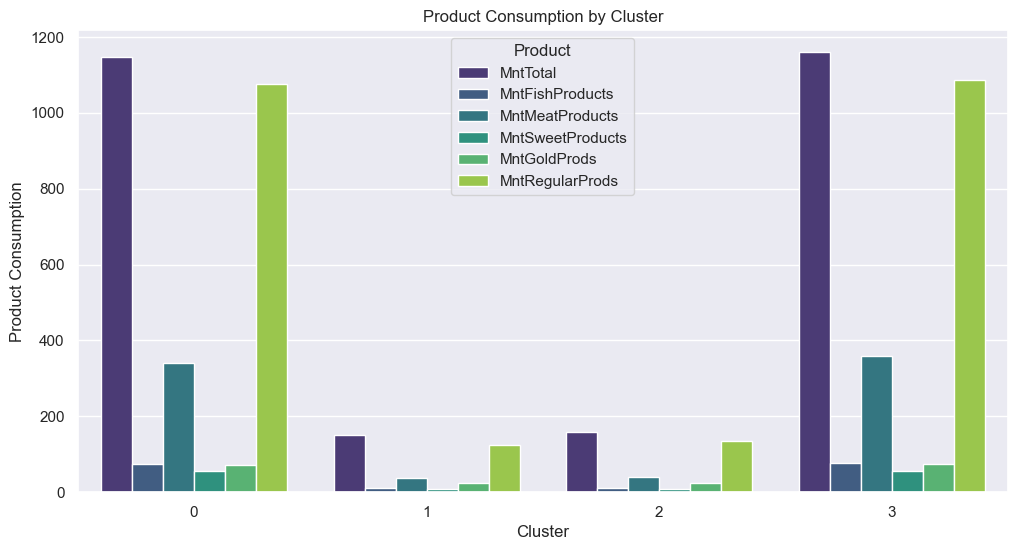

In [335]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.legend(title="Product")
plt.show()

## Cluster Sizes 

C:\Users\vip\AppData\Local\Temp\ipykernel_1312\2308420801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster',y='MntTotal',data=cluster_sizes,palette = 'viridis')


Text(0, 0.5, 'MntTotal')

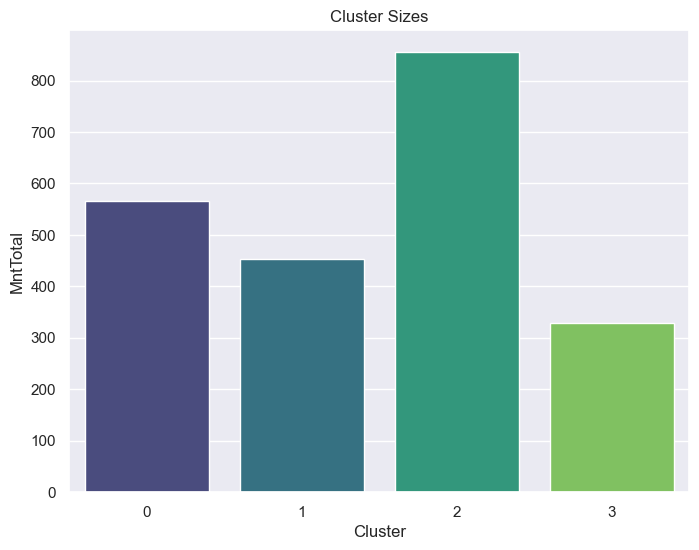

In [337]:
cluster_sizes = data.groupby('Cluster')['MntTotal'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster',y='MntTotal',data=cluster_sizes,palette = 'viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [338]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal']/total_rows*100)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,566,26.0
1,1,453,21.0
2,2,855,39.0
3,3,328,15.0


## Income By Cluster

C:\Users\vip\AppData\Local\Temp\ipykernel_1312\2508334791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster',y = 'Income',data=data,palette='viridis')


Text(0, 0.5, 'Income')

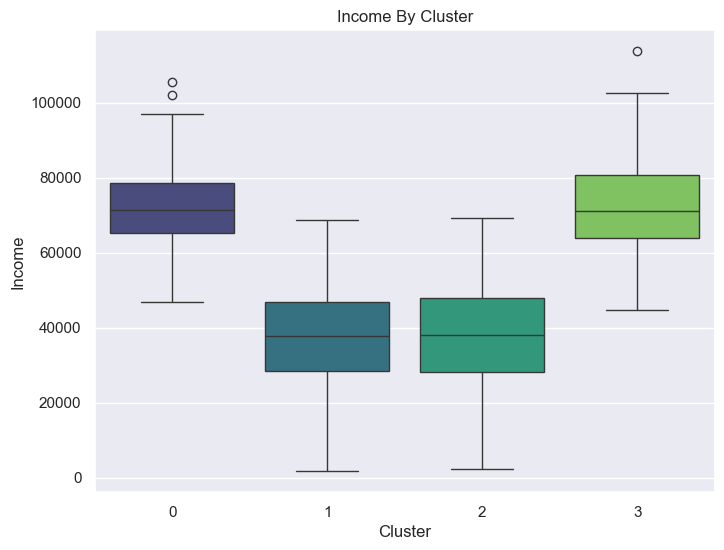

In [340]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster',y = 'Income',data=data,palette='viridis')
plt.title('Income By Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

## in_relationship feature by cluster 

C:\Users\vip\AppData\Local\Temp\ipykernel_1312\2476204706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster',y='In_relationship',data = data, palette = 'viridis')


Text(0.5, 1.0, 'In_relationship by Cluster')

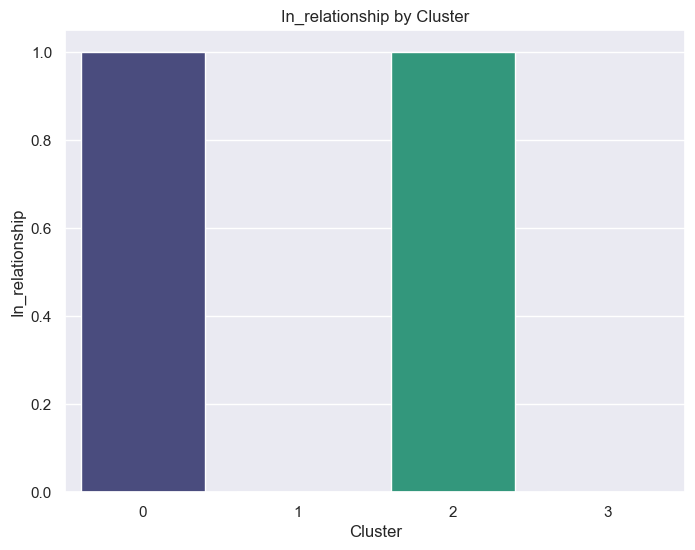

In [342]:
plt.figure(figsize = (8,6))
sns.barplot(x='Cluster',y='In_relationship',data = data, palette = 'viridis')
plt.title('In_relationship by Cluster')

## Results 

## Optimal Number of clusters = 4 

### Cluster Characteristics

#### Cluster 0: High value customers in realtion(either married or together)


### Cluster 1: Low Value Income Single Customer

### Cluster 2: Low Value Income Customers In Relationship 

### Cluster 3: High Value Income Sinlge Customer 

## Recommendations 